<b>Persistency of a Drug</b>

<b>Business Understanding</b>

<i>Problem Statement:</i>

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. <br>
To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

<i>ML Problem:</i>

With an objective to gather insights on the factors that are impacting the persistency, build a classification for the given dataset.

<i>Target Variable:</i> Persistency_Flag

<i>Task:</i>

Problem understanding<br>
Data Understanding <br>
Data Cleaning and Feature engineering <br>
Model Development <br>
Model Selection <br>
Model Evaluation <br>
Report the accuracy, precision and recall of both the class of target variable <br>
Report ROC-AUC as well <br>
Deploy the model <br>
Explain the challenges and model selection <br>

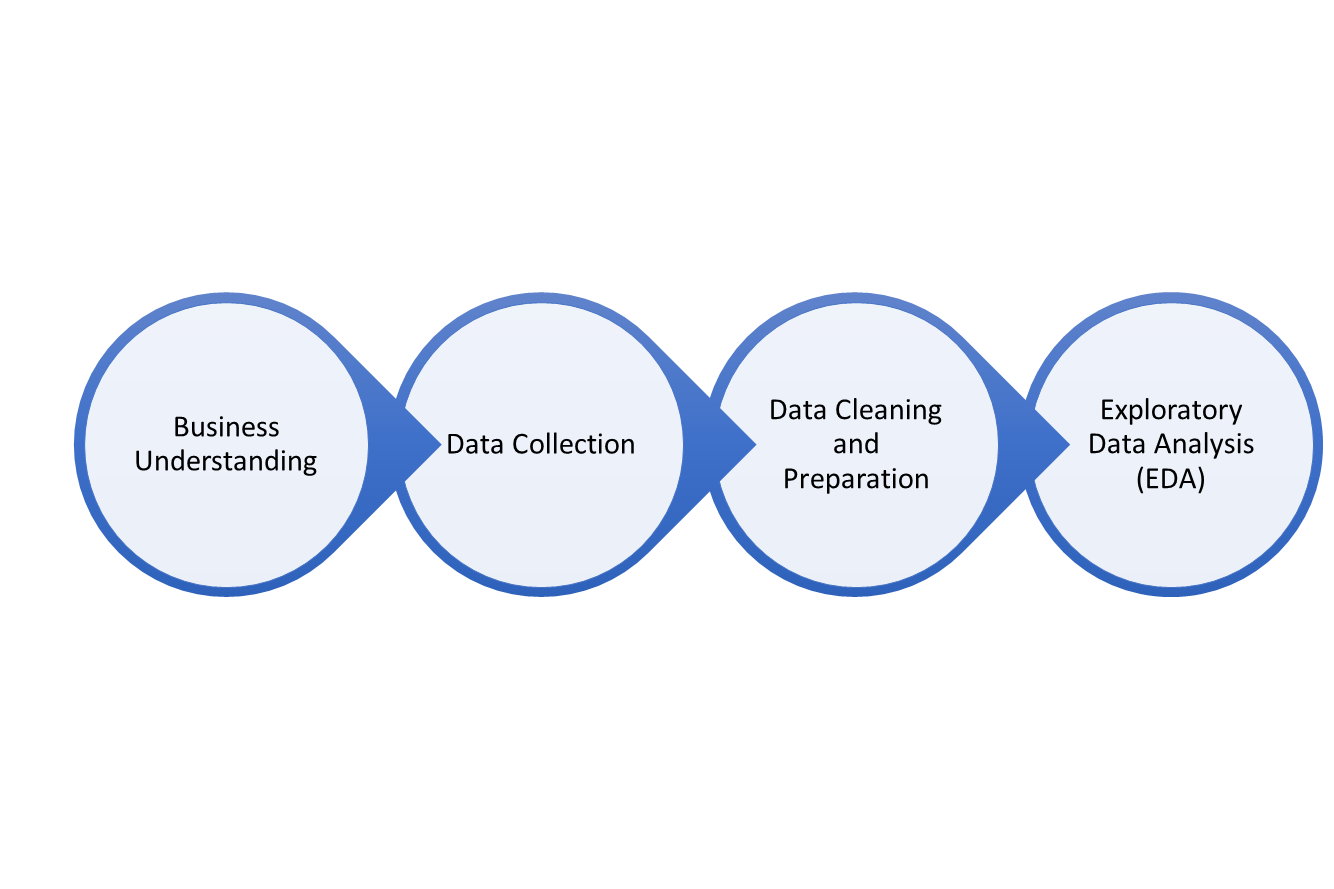

___

### <b>Data Collection</b>

<b>Import Libraries</b>

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


<b>Read the Excel file</b>

In [3]:
df = pd.read_excel("C:/Users/msavg/Documents/Healthcare-Drug_Persistency/Healthcare_dataset.xlsx", sheet_name= 'Dataset')
df_description = pd.read_excel("C:/Users/msavg/Documents/Healthcare-Drug_Persistency/Healthcare_dataset.xlsx", sheet_name= 'Feature Description')

This variable displays a description sheet within the .xlsx file 

In [4]:
df_description

,Bucket,Variable,Variable Description
0,Unique Row Id,Patient ID,Unique ID of each patient
1,Target Variable,Persistency_Flag,Flag indicating if a patient was persistent or...
2,Demographics,Age,Age of the patient during their therapy
3,NaN,Race,Race of the patient from the patient table
4,NaN,Region,Region of the patient from the patient table
5,NaN,Ethnicity,Ethnicity of the patient from the patient table
6,NaN,Gender,Gender of the patient from the patient table
7,NaN,IDN Indicator,Flag indicating patients mapped to IDN
8,Provider Attributes,NTM - Physician Specialty,Specialty of the HCP that prescribed the NTM Rx
9,Clinical Factors,NTM - T-Score,T Score of the patient at the time of the NTM ...


<b>Size of the Dataframe</b>

In [5]:
# Dataframe size (row, columns)
df.shape

(3424, 69)

<b>List the columns in the Dataframe</b>

In [6]:
df_columns = list(df.columns)
df.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

<b>Show the first 5 rows of the Dataframe</b>

In [7]:
pd.set_option('display.max_columns', None)
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [8]:
df['Ntm_Specialist_Flag'].value_counts()

Ntm_Specialist_Flag
Others        2013
Specialist    1411
Name: count, dtype: int64

<b>Dataframe datatypes</b>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

___

### <b> Data Cleaning and Preparation</b>

In [16]:
"""
The script performs the following cleaning processes:
- IMPUTER v.1.0.0
- Convert dataset into lowercase
- Convert categorical values into binary {'n' , 'y'}
- Save file as a .csv file

"""
;
# The steps below are shown for the development of the clean_data.py file.


''

In [10]:
%run clean_data.py

Cleaning of Healthcare_dataset completed!


#### <i><b>Check for any NaN Values</b></i>

In [19]:
total_missing = df.isnull().sum().sort_values(ascending=True)
pct_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, pct_missing], axis = 1, keys=['Total', 'Percentage'])

print("Total amount of NaN Values: " + str(missing_data['Total'].sum()))
missing_data

Total amount of NaN Values: 0


,Total,Percentage
Ptid,0,0.0
Comorb_Osteoporosis_without_current_pathological_fracture,0,0.0
Comorb_Personal_history_of_malignant_neoplasm,0,0.0
Comorb_Gastro_esophageal_reflux_disease,0,0.0
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,0,0.0
...,...,...
Change_T_Score,0,0.0
Tscore_Bucket_During_Rx,0,0.0
Risk_Segment_During_Rx,0,0.0
Injectable_Experience_During_Rx,0,0.0


<i>There are no NaN Values in the Dataframe</i>

In [20]:
#df['Change_Risk_Segment'].value_counts()
#df[df['Change_Risk_Segment'] == 'Unknown']['Change_Risk_Segment'].value_counts()

#### <b> Check for Unknown or Other values in the DataFrame by Counts and Percentage<b>

In [21]:
# Create a dataframe to store the columns with counts of unknowns
unknown_value = pd.DataFrame()

# Finds "Unknown" and "Other" values and counts them, then gets stored in the dataframe
for column in df:
    if any((df[column] == 'Unknown')):
        unknown_value[column] = (df[column] == 'Unknown' ).value_counts()
        
    elif any((df[column] == 'Other/Unknown')):
        unknown_value[column] = (df[column] == 'Other/Unknown' ).value_counts() 
    
    elif any((df[column] == 'Others')):
        unknown_value[column] = (df[column] == 'Others' ).value_counts() 



# Removes the index label
unknown_value.index.name = None

# Transpose the dataframe
unknown_value = unknown_value.T

# Converts the columns as str
unknown_value.columns = unknown_value.columns.astype(str)

# Rename the columns
unknown_value = unknown_value.rename(columns={'True': 'Unknown_Others', 'False': 'Categorized'})

# Unknown/Others percentage
unknown_value['Pct_of_Unknown_Other'] = (100 * (unknown_value['Unknown_Others'] / (unknown_value['Categorized'] + unknown_value['Unknown_Others']))).round(2)

# Sort values
unknown_value = unknown_value.sort_values(by='Pct_of_Unknown_Other', ascending=True)
unknown_value

,Categorized,Unknown_Others,Pct_of_Unknown_Other
Region,3364,60,1.75
Ethnicity,3333,91,2.66
Race,3327,97,2.83
Ntm_Speciality,3114,310,9.05
Risk_Segment_During_Rx,1927,1497,43.72
Tscore_Bucket_During_Rx,1927,1497,43.72
Change_T_Score,1927,1497,43.72
Ntm_Specialist_Flag,1411,2013,58.79
Change_Risk_Segment,1195,2229,65.10


___

#### <b> Create a Mode Imputer </b>

In [22]:
def mode_imputer(): 

    """
    This script will impute the column values categorized as "Unknown".

    It will iterate through the unknown_value dataframe and save the 
    indexes in the list variable and then will iterate through the 
    df and impute each element in the list.
    """ ;

    columns_to_impute = []
    for column_name, pct in unknown_value['Pct_of_Unknown_Other'].items():
        if pct < 10:
            columns_to_impute.append(column_name)


    for column in columns_to_impute:
        mode_value = df[column].mode()[0]
        df[column] = df[column].replace({'Unknown': mode_value, 'Others': mode_value, 'Other/Unknown': mode_value})

    return df

In [26]:
specialty = df.groupby(['Ntm_Specialist_Flag', 'Ntm_Speciality'])['Ntm_Speciality'].count().unstack().reset_index().T
specialty = specialty.fillna(0)
specialty.index.name = None
specialty.columns = ['Others', 'Specialist']
specialty = specialty[~(specialty['Others'] == 'Others')]
specialty = specialty.sort_values(by='Others', ascending=True)
specialty

,Others,Specialist
UROLOGY,0,33.0
OBSTETRICS AND GYNECOLOGY,0,90.0
ENDOCRINOLOGY,0,458.0
OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,0,1.0
RHEUMATOLOGY,0,604.0
ONCOLOGY,0,225.0
OCCUPATIONAL MEDICINE,1.0,0
NUCLEAR MEDICINE,1.0,0
NEUROLOGY,1.0,0
PAIN MEDICINE,1.0,0


<i>The results above shows the amount of 'Unknown' and or 'Other' data in the dataframe. This is important to know how much of it is impacting the categories and data as a whole. Due to the amount of 'Unknown' or 'Other' values, an imputating the data will be appropriate to not cause any outliers and have a concise reading of data to better analyze.</i>

___

#### <i><b>Check for Duplicated values</b></i>

In [27]:
df.duplicated().value_counts()

False    3424
Name: count, dtype: int64

<i> There are no duplicated values in the Dataframe</i>

#### <i><b>Convert Dataframe to lowercase</b></i>

In [28]:
# df_lower = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
# df_lower.columns = df_lower.columns.str.lower()

In [29]:
# pd.set_option('display.max_columns', None)
# df_lower[df_lower['count_of_risks'] == 7]

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
817,p818,persistent,female,african american,not hispanic,south,55-65,general practitioner,others,ob/gyn/others/pcp/unknown,y,y,5,y,n,n,hr_vhr,>-2.5,hr_vhr,<=-2.5,no change,no change,adherent,y,y,y,y,y,y,n,y,n,n,n,n,y,n,n,y,n,y,y,n,y,y,y,y,y,n,n,n,y,n,y,n,y,n,y,n,y,n,y,y,n,n,n,n,n,7
1059,p1060,non-persistent,female,caucasian,not hispanic,south,65-75,general practitioner,others,ob/gyn/others/pcp/unknown,n,n,0,n,y,n,hr_vhr,<=-2.5,unknown,unknown,unknown,unknown,adherent,y,y,y,y,n,y,y,n,y,y,n,n,y,n,n,n,y,y,y,y,y,y,n,n,n,n,y,n,n,n,n,n,n,y,y,n,n,n,y,y,y,n,n,n,y,7


In [30]:
df_lower['ntm_speciality_bucket'].value_counts()

ntm_speciality_bucket
ob/gyn/others/pcp/unknown    2104
endo/onc/uro                  716
rheum                         604
Name: count, dtype: int64

In [7]:
df_lower['risk_segment_during_rx'].value_counts()

NameError: name 'df_lower' is not defined

#### <b>Convert 'n' and 'y' to 0 and 1 respectively</b>

In [32]:
"""
To fit the Dataframe below into a model, we need to convert the "y" and "n" values into numbers; 
{"n" : 0}
{"y" : 1}

Having the numerical values, we can further analyze the data, and help prepare for modeling.

""";

In [33]:
# df_lower.filter(like='risk', axis=1).drop(columns=['risk_segment_prior_ntm', 'risk_segment_during_rx', 'change_risk_segment']).replace({'n': 0, 'y': 1})

In [34]:
# def binary(df):
#     for column in df_lower.columns:
#         if set(df[column].unique()) == {'n','y'}:
#             df[column] = df[column].replace({'n' : 0 , 'y' : 1})
#     return df

In [35]:
binary(df_lower)
df_lower

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,p1,persistent,male,caucasian,not hispanic,west,>75,general practitioner,others,ob/gyn/others/pcp/unknown,0,0,0,0,0,0,vlr_lr,>-2.5,vlr_lr,<=-2.5,no change,unknown,adherent,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,p2,non-persistent,male,asian,not hispanic,west,55-65,general practitioner,others,ob/gyn/others/pcp/unknown,0,0,0,0,0,0,vlr_lr,>-2.5,unknown,unknown,unknown,unknown,adherent,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,p3,non-persistent,female,caucasian,hispanic,midwest,65-75,general practitioner,others,ob/gyn/others/pcp/unknown,0,0,0,0,0,0,hr_vhr,<=-2.5,hr_vhr,<=-2.5,no change,no change,adherent,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2
3,p4,non-persistent,female,caucasian,not hispanic,midwest,>75,general practitioner,others,ob/gyn/others/pcp/unknown,0,1,0,0,0,0,hr_vhr,>-2.5,hr_vhr,<=-2.5,no change,no change,adherent,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,p5,non-persistent,female,caucasian,not hispanic,midwest,>75,general practitioner,others,ob/gyn/others/pcp/unknown,1,1,0,0,0,0,hr_vhr,<=-2.5,unknown,unknown,unknown,unknown,adherent,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,p3420,persistent,female,caucasian,not hispanic,south,>75,general practitioner,others,ob/gyn/others/pcp/unknown,0,0,0,0,0,0,vlr_lr,>-2.5,unknown,unknown,unknown,unknown,adherent,1,1,1,0,1,1,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3420,p3421,persistent,female,caucasian,not hispanic,south,>75,general pract

Now that the values have been converted into 0 and 1, its one step closer to be ready for modeling. <br>
We still need to convert the other features into numerical categories since the model only takes numbers.

___

### <b>Exploratory Data Analaysis (EDA) </b>

<ul>
<li>What gender is most persistent of taking the drug?</li>
<li>Is age a big contribution to drug persistency?</li>
<li>What is the percentage of persistency based on race?</li>
<li>What risk factor contributes to the rate of persistency of a drug?</li>
<li>Do fragility fracture play a role in persistency?</li>
</ul>

Now that the data is cleaned and newly saved into a .csv file, the file can be read as a dataframe and prepared for the Exploratory Data Analysis.

In [4]:
df = pd.read_csv('healthcare_data_cleaned.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   ptid                                                                3424 non-null   object
 1   persistency_flag                                                    3424 non-null   object
 2   gender                                                              3424 non-null   object
 3   race                                                                3424 non-null   object
 4   ethnicity                                                           3424 non-null   object
 5   region                                                              3424 non-null   object
 6   age_bucket                                                          3424 non-null   object
 7   ntm_speciality          

In [13]:
df.head()

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,p1,persistent,male,caucasian,not hispanic,west,>75,general practitioner,others,ob/gyn/others/pcp/unknown,0,0,0,0,0,0,vlr_lr,>-2.5,vlr_lr,<=-2.5,no change,unknown,adherent,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,p2,non-persistent,male,asian,not hispanic,west,55-65,general practitioner,others,ob/gyn/others/pcp/unknown,0,0,0,0,0,0,vlr_lr,>-2.5,unknown,unknown,unknown,unknown,adherent,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,p3,non-persistent,female,caucasian,hispanic,midwest,65-75,general practitioner,others,ob/gyn/others/pcp/unknown,0,0,0,0,0,0,hr_vhr,<=-2.5,hr_vhr,<=-2.5,no change,no change,adherent,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2
3,p4,non-persistent,female,caucasian,not hispanic,midwest,>75,general practitioner,others,ob/gyn/others/pcp/unknown,0,1,0,0,0,0,hr_vhr,>-2.5,hr_vhr,<=-2.5,no change,no change,adherent,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,p5,non-persistent,female,caucasian,not hispanic,midwest,>75,general practitioner,others,ob/gyn/others/pcp/unknown,1,1,0,0,0,0,hr_vhr,<=-2.5,unknown,unknown,unknown,unknown,adherent,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [14]:
df.shape

(3424, 69)

In [15]:
df['race'].value_counts()

race
caucasian           3245
african american      95
asian                 84
Name: count, dtype: int64

In [16]:
df['ethnicity'].value_counts()

ethnicity
not hispanic    3326
hispanic          98
Name: count, dtype: int64

In [17]:
df['region'].value_counts()

region
midwest      1443
south        1247
west          502
northeast     232
Name: count, dtype: int64

In [18]:
df['ntm_speciality'].value_counts()

ntm_speciality
general practitioner                                              1845
rheumatology                                                       604
endocrinology                                                      458
oncology                                                           225
obstetrics and gynecology                                           90
urology                                                             33
orthopedic surgery                                                  30
cardiology                                                          22
pathology                                                           16
hematology & oncology                                               14
otolaryngology                                                      14
pediatrics                                                          13
physical medicine and rehabilitation                                11
surgery and surgical specialties                              

Now that the Unknown values went through mode imputer, the Unknown values have migrated to general_practicioner

In [19]:
df['risk_segment_prior_ntm'].value_counts()

risk_segment_prior_ntm
vlr_lr    1931
hr_vhr    1493
Name: count, dtype: int64

In [20]:
df['risk_segment_during_rx'].value_counts()

risk_segment_during_rx
unknown    1497
hr_vhr      965
vlr_lr      962
Name: count, dtype: int64

In [21]:
df['adherent_flag'].value_counts()

adherent_flag
adherent        3251
non-adherent     173
Name: count, dtype: int64

In [ ]:
sns.countplot(data=df, x='comorb_vitamin_d_deficiency')
plt.show()

<b>What is the percentage of persistency based on race?</b>

In [9]:
race_count = df['race'].value_counts().reset_index()
race_count['pct'] = (100 * (race_count['count']/race_count['count'].sum())).round(2)
race_count

,race,count,pct
0,caucasian,3245,94.77
1,african american,95,2.77
2,asian,84,2.45


In [13]:
persistency_by_race = df.groupby(['race', 'persistency_flag'])['race'].count().unstack().reset_index()
persistency_by_race['persistent_pct'] = (100 * (persistency_by_race['persistent']/(persistency_by_race['non-persistent'] + persistency_by_race['persistent']))).round(2)
persistency_by_race['non_persistent_pct'] = (100 * (persistency_by_race['non-persistent']/(persistency_by_race['non-persistent'] + persistency_by_race['persistent']))).round(2)
persistency_by_race['total'] = persistency_by_race['non-persistent']+ persistency_by_race['persistent']
persistency_by_race

persistency_flag,race,non-persistent,persistent,persistent_pct,non_persistent_pct,total
0,african american,65,30,31.58,68.42,95
1,asian,43,41,48.81,51.19,84
2,caucasian,2027,1218,37.53,62.47,3245


<Axes: xlabel='race', ylabel='count'>

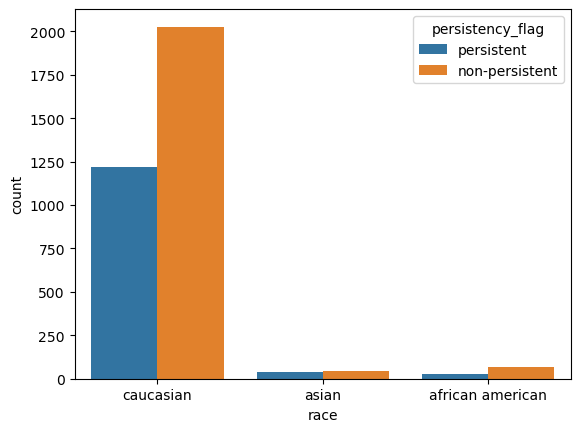

In [16]:
x = df['race']
hue = df['persistency_flag']
sns.countplot(data=df, x=x, hue=hue)

After cleaning the data, we can see the number of Caucasian's in the dataset population is 94.77%, African American 2.77% and Asian 2.45%.
Because of the mode imputer applied to the dataset, the number of Caucasian's had increased.

<b>What gender is most persistent of taking the drug?</b>

In [11]:
persistency_by_gender = df.groupby(['gender', 'persistency_flag'])['gender'].count().unstack().reset_index()
persistency_by_gender['persistent_pct'] = (100 * (persistency_by_gender['persistent']/(persistency_by_gender['non-persistent'] + persistency_by_gender['persistent']))).round(2)
persistency_by_gender['non_persistent_pct'] = (100 * (persistency_by_gender['non-persistent']/(persistency_by_gender['non-persistent'] + persistency_by_gender['persistent']))).round(2)
persistency_by_gender['total'] = persistency_by_gender['non-persistent']+ persistency_by_gender['persistent']
persistency_by_gender


persistency_flag,gender,non-persistent,persistent,persistent_pct,non_persistent_pct,total
0,female,2018,1212,37.52,62.48,3230
1,male,117,77,39.69,60.31,194


<Axes: xlabel='persistency_flag', ylabel='count'>

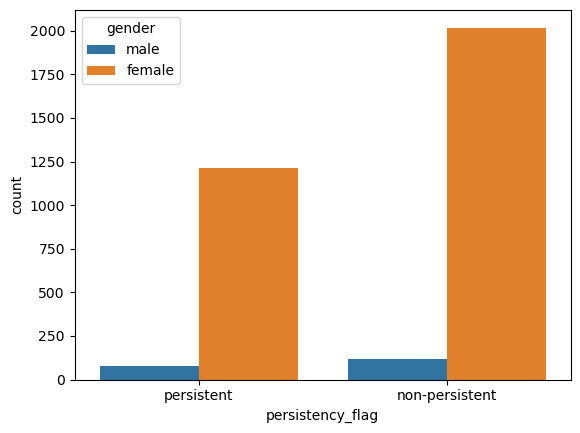

In [26]:
x = df['persistency_flag']
hue = df['gender']
sns.countplot(data=df,x=x, hue=hue)

Males have the lowest sample size of persistent and non-persistent of a drug totaling 194, whereas Females have the highest sample size totaling 3230. 

Males tend to have higher persistency than Females by 2.17%, whereas Females have higher non-persistency than Males by 2.17%.

In [ ]:
# Assuming you have a DataFrame 'df' and want to visualize outliers in column 'your_column'


data = df['age_bucket']

# Create a box plot to visualize potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data.count, vert=False)  # Create a horizontal box plot

# Add labels and title
plt.xlabel('Values')
plt.title('Box Plot of your_column')

# Show the plot
plt.show()

<b>What risk factor contributes to the rate of persistency of a drug?</b>

<Axes: xlabel='persistency_flag', ylabel='count'>

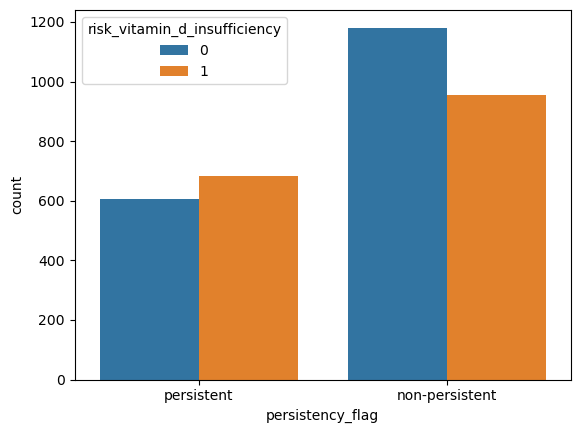

In [24]:
x = df['persistency_flag']
hue = df['risk_vitamin_d_insufficiency']
sns.countplot(data=df,x=x, hue=hue)

<Axes: xlabel='persistency_flag', ylabel='count'>

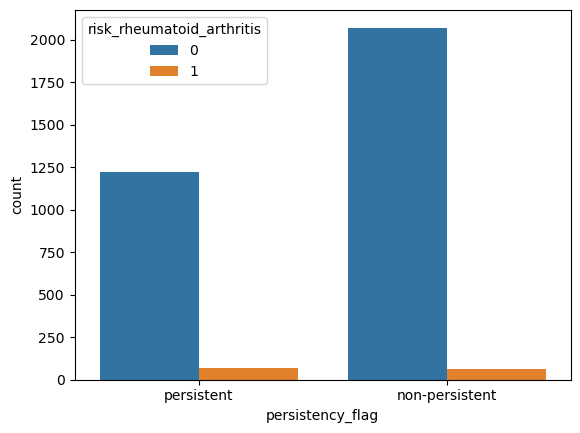

In [7]:
x = df['persistency_flag']
hue = df['risk_rheumatoid_arthritis']
sns.countplot(data=df,x=x, hue=hue)

<Axes: xlabel='age_bucket', ylabel='frag_frac_during_rx'>

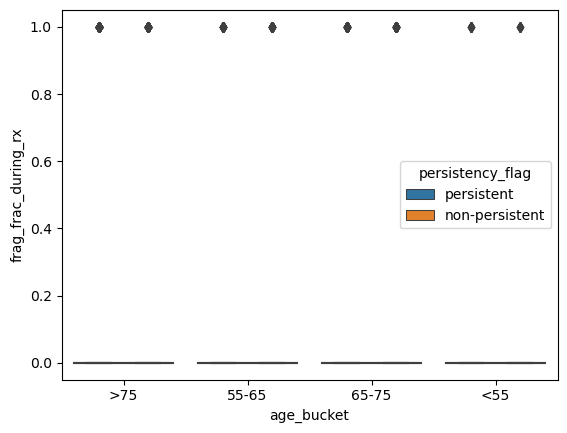

In [ ]:
x = df_lower['persistency_flag']
y = df_lower['frag_frac_during_rx']
sns.boxplot(data=df_lower,x=df_lower['age_bucket'], y=y, hue = x)

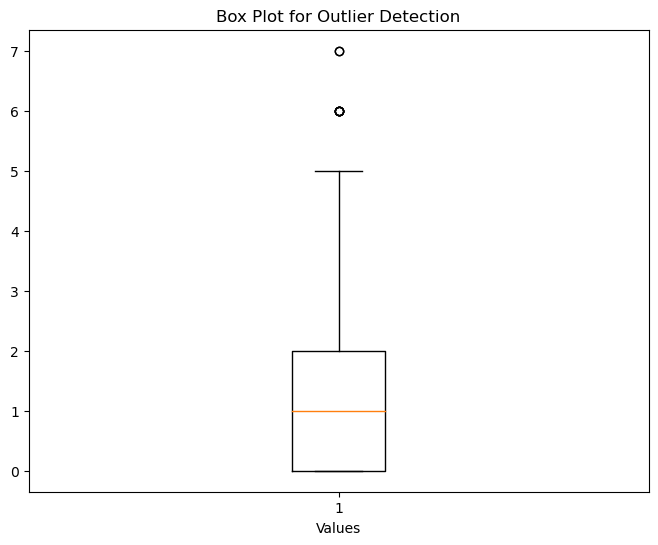

In [53]:
data = [10, 15, 20, 25, 30, 35, 40, 45, 50, 200]

# Create a pandas DataFrame
#df = pd.DataFrame(df_lower, columns=['persistency_flag'])

# Create a box plot to visualize potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df_lower['count_of_risks'])  # Create a horizontal box plot

# Add labels and title
plt.xlabel('Values')
plt.title('Box Plot for Outlier Detection')

# Show the plot
plt.show()

In [57]:
df_lower['count_of_risks'].value_counts().sort_index()

count_of_risks
0     970
1    1242
2     781
3     317
4      91
5      15
6       6
7       2
Name: count, dtype: int64

In [ ]:
df_lower['age_bucket'].value_counts()

age_bucket
>75      1439
65-75    1086
55-65     733
<55       166
Name: count, dtype: int64

In [ ]:
df_lower['region'].value_counts()

region
midwest          1383
south            1247
west              502
northeast         232
other/unknown      60
Name: count, dtype: int64

In [ ]:
df_lower['ethnicity'].value_counts()

ethnicity
not hispanic    3235
hispanic          98
unknown           91
Name: count, dtype: int64

<b>Remove unecessary columns from the Dataframe</b>

In [ ]:
df_lower['ntm_specialist_flag'].value_counts()

ntm_specialist_flag
others        2013
specialist    1411
Name: count, dtype: int64

In [ ]:
df_lower['idn_indicator'].value_counts()

idn_indicator
1    2557
0     867
Name: count, dtype: int64

In [ ]:
skewness = df_lower['idn_indicator'].skew()

if skewness > 1:
    print("The data is positively skewed.")
elif skewness < -1:
    print("The data is negatively skewed.")
else:
    print("The data is approximately normally distributed.")

The data is negatively skewed.


In [ ]:
df_lower.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
gluco_record_prior_ntm,3424.0,0.235105,0.424126,0.0,0.0,0.0,0.0,1.0
gluco_record_during_rx,3424.0,0.263435,0.440560,0.0,0.0,0.0,1.0,1.0
dexa_freq_during_rx,3424.0,3.016063,8.136545,0.0,0.0,0.0,3.0,146.0
dexa_during_rx,3424.0,0.273364,0.445751,0.0,0.0,0.0,1.0,1.0
frag_frac_prior_ntm,3424.0,0.161215,0.367783,0.0,0.0,0.0,0.0,1.0
frag_frac_during_rx,3424.0,0.121787,0.327088,0.0,0.0,0.0,0.0,1.0
idn_indicator,3424.0,0.746787,0.434915,0.0,0.0,1.0,1.0,1.0
injectable_experience_during_rx,3424.0,0.892523,0.309764,0.0,1.0,1.0,1.0,1.0
comorb_encounter_for_screening_for_malignant_neoplasms,3424.0,0.447722,0.497332,0.0,0.0,0.0,1.0,1.0
comorb_encounter_for_immunization,3424.0,0.441881,0.496683,0.0,0.0,0.0,1.0,1.0


<i>Persistency flag</i>

In [ ]:
df_lower['persistency_flag'].value_counts()

persistency_flag
non-persistent    2135
persistent        1289
Name: count, dtype: int64

<Axes: xlabel='persistency_flag'>

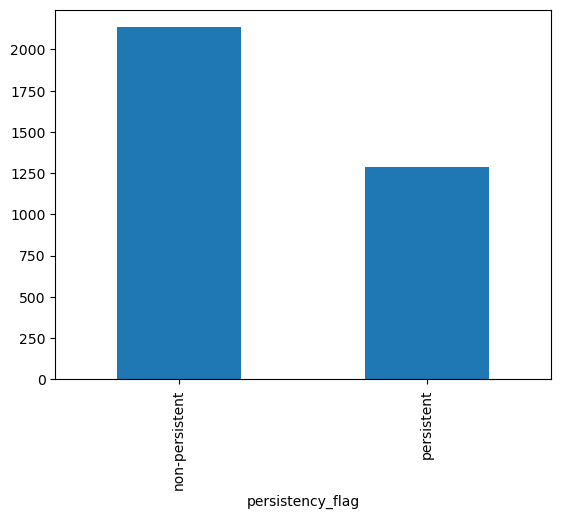

In [ ]:
df_lower['persistency_flag'].value_counts().plot(kind='bar')

There seems to be an imbalance that needs to be corrected in the model building stage.

<i>Race</i>

In [28]:
race_count = df['race'].value_counts().reset_index()
race_count.columns = ['race', 'count']
race_count['percentage'] = (race_count['count']/(race_count['count'].sum())) * 100

In [29]:
print(race_count)

               race  count  percentage
0         caucasian   3245   94.772196
1  african american     95    2.774533
2             asian     84    2.453271


<Axes: xlabel='race'>

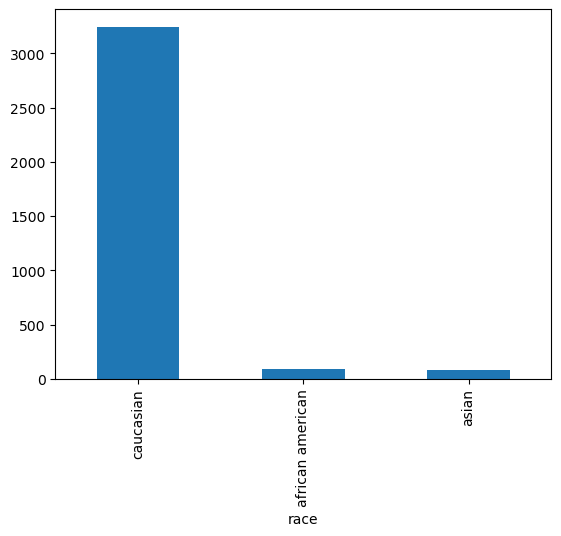

In [31]:
df['race'].value_counts().plot(kind='bar')

Caucasian's are the most accounted race in the Dataset by 91.94%, followed by:<br> Other/Unknown 2.83% <br> African American 2.77% <br> Asian 2.45%

<i>Gender</i>

In [ ]:
gender_count = df_lower['gender'].value_counts().reset_index()
gender_count.columns = ['gender', 'count']
gender_count['percentage'] = (gender_count['count']/(gender_count['count'].sum())) * 100

In [ ]:
gender_count

,gender,count,percentage
0,female,3230,94.334112
1,male,194,5.665888


<Axes: xlabel='gender'>

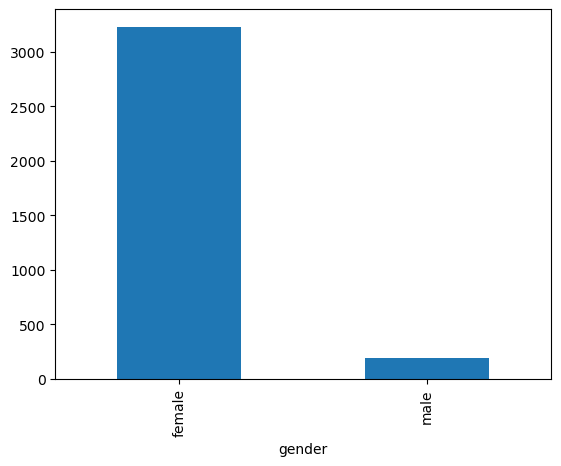

In [ ]:
df_lower['gender'].value_counts().plot(kind='bar')

Female takes the majority count in the dataset by 3,230 (94.33%), whereas Male count is 194 (5.67%).

<i> Region </i>

In [ ]:
region_count = df_lower['region'].value_counts().reset_index()
region_count.columns = ['region', 'count']
region_count['percentage'] = (region_count['count']/(region_count['count'].sum())) * 100

In [ ]:
region_count

,region,count,percentage
0,midwest,1383,40.391355
1,south,1247,36.419393
2,west,502,14.661215
3,northeast,232,6.775701
4,other/unknown,60,1.752336


<Axes: xlabel='region'>

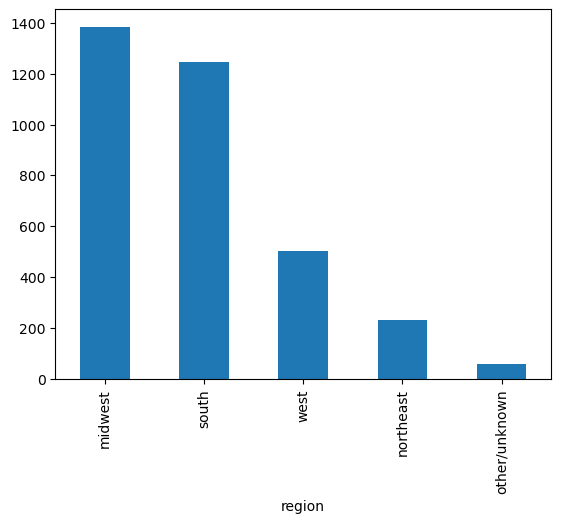

In [ ]:
df_lower['region'].value_counts().plot(kind='bar')

The Midwest region is responsible of roughly 40.39% of the count from the Dataset.

<i>Age Bucket</i>

<b>Is age a big contribution to drug persistency?</b>

In [ ]:
age_count = df_lower['age_bucket'].value_counts().reset_index()
age_count.columns = ['age', 'count']
age_count['percentage'] = (age_count['count']/(age_count['count'].sum())) * 100

In [ ]:
age_count

,age,count,percentage
0,>75,1439,42.026869
1,65-75,1086,31.717290
2,55-65,733,21.407710
3,<55,166,4.848131


<Axes: xlabel='age_bucket'>

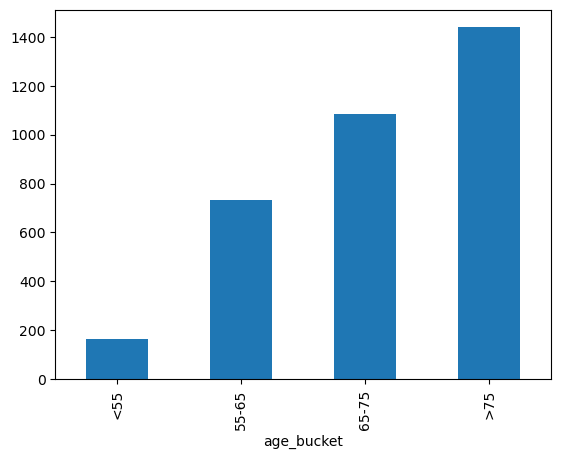

In [ ]:
df_lower['age_bucket'].value_counts().sort_values().plot(kind='bar')

In [124]:
# age_persistency = df_lower[['persistency_flag','age_bucket']]
# age_persistency['age_bucket'].value_counts().sort_values()
age_persistency = df_lower.groupby(['age_bucket','persistency_flag'])['persistency_flag'].count().sort_values().unstack()#.reset_index()

age_persistency['pct_of_persistency'] = (100 * (age_persistency['persistent'] / (age_persistency['non-persistent'] + age_persistency['persistent']))).round(2)
age_persistency['pct_of_non_persistency'] = (100 * (age_persistency['non-persistent'] / (age_persistency['non-persistent'] + age_persistency['persistent']))).round(2)


age_persistency['total'] = age_persistency['non-persistent'] + age_persistency['persistent']
age_persistency = age_persistency.sort_values(by='total')
age_persistency.index.name = None
#age_persistency.drop(columns=['non-persistent', 'persistent', 'total']).plot(kind='bar')
age_persistency



persistency_flag,non-persistent,persistent,pct_of_persistency,pct_of_non_persistency,total
<55,103,63,37.95,62.05,166
55-65,472,261,35.61,64.39,733
65-75,653,433,39.87,60.13,1086
>75,907,532,36.97,63.03,1439


Text(0.5, 0, 'Age')

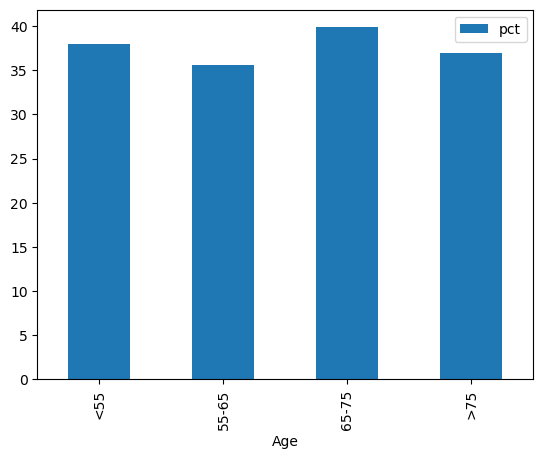

In [134]:
# age_persistency = df_lower[['persistency_flag','age_bucket']]
# age_persistency['age_bucket'].value_counts().sort_values()
age_persistency = df_lower.groupby(['age_bucket','persistency_flag'])['persistency_flag'].count().sort_values().unstack()#.reset_index()

age_persistency['pct'] = (100 * (age_persistency['persistent'] / (age_persistency['non-persistent'] + age_persistency['persistent']))).round(2)

age_persistency['total'] = age_persistency['non-persistent'] + age_persistency['persistent']
age_persistency = age_persistency.sort_values(by='total')

#age_persistency
#age_persistency = age_persistency.reset_index()
#ge_persistency.index.name = None
age_persistency.plot(kind='bar', y='pct').set_xlabel('Age')#.set_ylabel('Percentage')

2.270000000000003


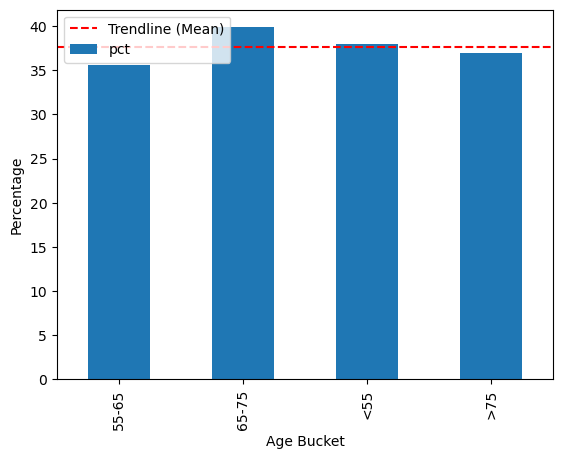

In [137]:
age_persistency = df_lower.groupby(['age_bucket','persistency_flag'])['persistency_flag'].count().sort_values().unstack().reset_index()
age_persistency['pct'] = (100 * (age_persistency['persistent'] / (age_persistency['non-persistent'] + age_persistency['persistent']))).round(2)


# Sample data (assuming your data frame is named 'age_persistency')
# Ensure 'age_bucket' is the index
age_persistency = age_persistency.set_index('age_bucket')

# Create a bar chart
ax = age_persistency['pct'].plot(kind='bar')

# Calculate and add a trendline (in this case, a horizontal line representing the mean)
mean_value = age_persistency['pct'].mean()
ax.axhline(y=mean_value, color='red', linestyle='--', label='Trendline (Mean)')

# Add labels and legend
plt.xlabel('Age Bucket')
plt.ylabel('Percentage')
plt.legend()

# Show the plot
print(age_persistency['pct'].max() - mean_value)
plt.show()


Age group of 65-75 has the highest percentage of drug persistency at 39.87% out of the others, exceeding the mean persistency by 2.27% from all age groups.

Over the age of 75 takes the majority count in the Dataset by 42.02%.

<i>Race by Gender</i>

In [ ]:
race_gender = df_lower.groupby(['race','gender'])['gender'].count().unstack().reset_index()
race_gender

gender,race,female,male
0,african american,91,4
1,asian,81,3
2,caucasian,3058,187


<i>Age by Gender</i>

In [ ]:
age_gender = df_lower.groupby(['age_bucket','gender'])['gender'].count().unstack().reset_index()
age_gender['female_pct'] = (100 * (age_gender['female']  / (age_gender['female'] + age_gender['male']))).round(2)
age_gender['male_pct'] =  (100 *(age_gender['male'] / (age_gender['female'] + age_gender['male']))).round(2)
age_gender.rename_axis(columns='index', inplace=True)
age_gender


index,age_bucket,female,male,female_pct,male_pct
0,55-65,710,23,96.86,3.14
1,65-75,1038,48,95.58,4.42
2,<55,148,18,89.16,10.84
3,>75,1334,105,92.70,7.30


<i>Specialty</i>

<Axes: ylabel='ntm_speciality'>

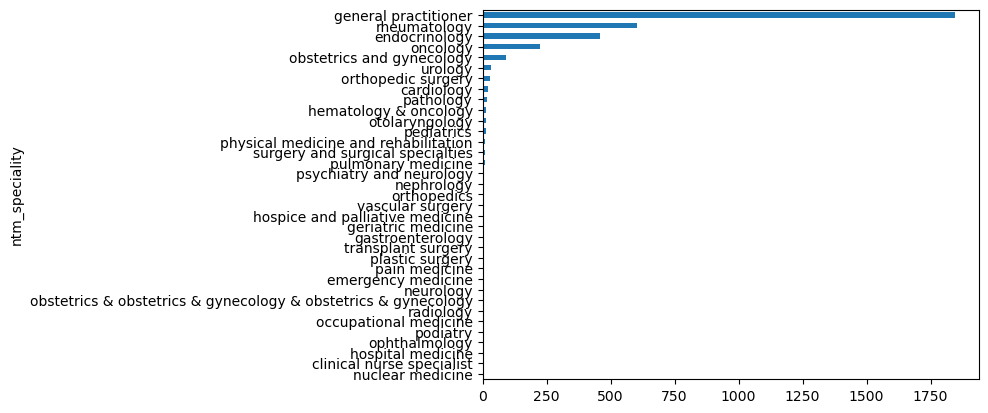

In [ ]:
df_lower['ntm_speciality'].value_counts().sort_values(ascending=True).plot(kind='barh')

In [32]:
df['count_of_risks'].value_counts().sort_index()

count_of_risks
0     970
1    1242
2     781
3     317
4      91
5      15
6       6
7       2
Name: count, dtype: int64

In [ ]:
df_lower['race'].value_counts()

race
caucasian           3148
other/unknown         97
african american      95
asian                 84
Name: count, dtype: int64

In [ ]:
df_lower.hist()

In [ ]:
sns.pairplot(df_lower)